In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
euclidian_distance = lambda x, y: np.linalg.norm(y - x, axis=1)

def generate_random_points(clusters, point_amount, spread):
    X, y = [], []
    
    for id_c in range(clusters):
        center = np.random.rand(2) * 100
        cluster_points = center + np.random.randn(point_amount, 2) * spread
        
        X.extend(cluster_points)
        y.extend([id_c] * point_amount)
    
    return np.array(X), y

def generate_centroids_random(k, points): 
    clusters = {} 
    num_points = points.shape[0] 
    for idx in range(k): 
        random_index = np.random.randint(0, num_points) 
        center = points[random_index] 
        cluster = { 'center': center, 'points': [] } 
        clusters[idx] = cluster 
    return clusters

def generate_centroids(k, points):
    clusters = {}
    
    for idx in range(k):
        center = points.mean(axis=0) + np.random.rand(2) * 5.
        cluster = {
            'center' : center,
            'points' : []
        }
        
        clusters[idx] = cluster

    return clusters

def show_points(X, clusters=[]):
    plt.scatter(X[:,0],X[:,1])
    plt.grid(True)
    
    for i in clusters:
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],marker = '*',c = 'red')
    
    plt.show()

def show_points_with_clusters(X, predictions, clusters):
    plt.scatter(X[:,0],X[:,1], c=predictions)
    plt.grid(True)
    
    for i in clusters:
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],marker = '*',c = 'red')
    
    plt.show()

def assign_points(x_train, clusters):
    centroids = np.array([c['center'] for c in clusters.values()])

    for x in x_train:
        distances = euclidian_distance(x, centroids)
        index = np.argsort(distances)[0]

        clusters[index]['points'].append(x)

    return clusters

def update_centroids(clusters):
    for i in clusters:
        points = np.array(clusters[i]['points'])
        
        if points.shape[0] > 0:
            clusters[i]['center'] = points.mean(axis=0)
            clusters[i]['points'] = []
    
    return clusters

def predict(X, clusters):
    centroids = np.array([c['center'] for c in clusters.values()])
    y = []

    for x in X:
        distances = euclidian_distance(x, centroids)
        index = np.argsort(distances)[0]

        y.append(index)

    return y


# X, y = generate_random_points(6, 100, 6.2)
# clusters = generate_centroids(k=5, points=X)

# show_points(X, clusters)

# for _ in range(1000):
#     clusters = assign_points(x_train=X, clusters=clusters)
#     clusters = update_centroids(clusters=clusters)

# predictions = predict(X, clusters)
# show_points_with_clusters(X, predictions, clusters)



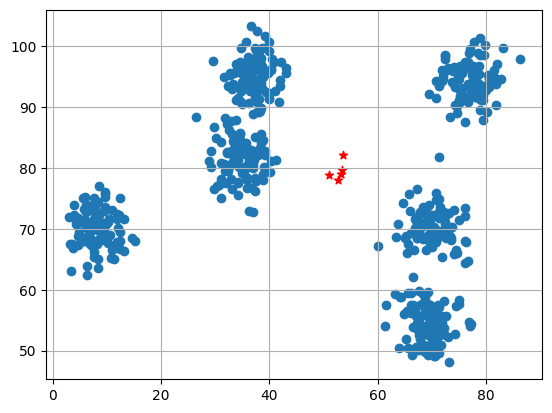

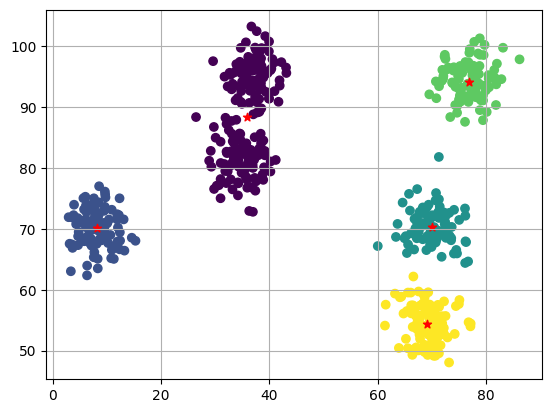

In [2]:
X, y = generate_random_points(6, 100, 3.0)
clusters = generate_centroids(k=5, points=X)

show_points(X, clusters)

for _ in range(1000):
    clusters = assign_points(x_train=X, clusters=clusters)
    clusters = update_centroids(clusters=clusters)

predictions = predict(X, clusters)
show_points_with_clusters(X, predictions, clusters)

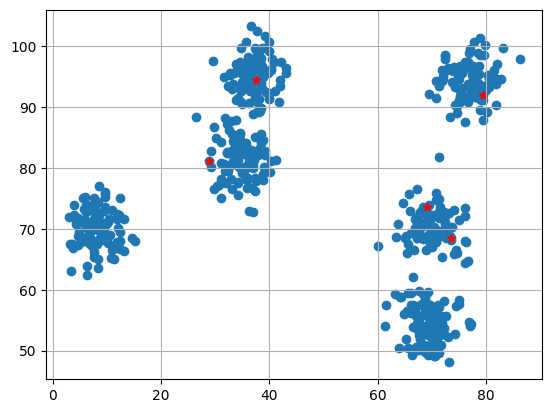

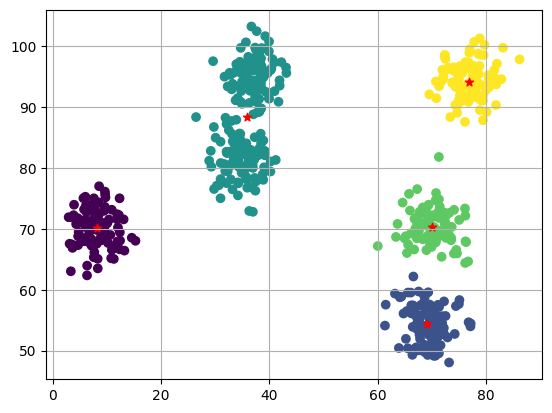

In [8]:
X, y = generate_random_points(6, 100, 3.0)
clusters = generate_centroids_random(k=5, points=X)

show_points(X, clusters)

for _ in range(1000):
    clusters = assign_points(x_train=X, clusters=clusters)
    clusters = update_centroids(clusters=clusters)

predictions = predict(X, clusters)
show_points_with_clusters(X, predictions, clusters)